Customer churn (or customer attrition) refers to the percentage of customers who stop doing business with a company within a given time period. It is a crucial metric for businesses as it directly impacts revenue, growth, and long-term sustainability.

Problem Statement Here we have a data set of 10,000 customers of a particular bank. The target variable is Exited which is binary- 1 if the customer leaves, 0 otherwise. There are a bunch of features as well- gender, age, location, credit score, estimated salary,satifactory score etc.

The objective is to figure out the important features which are responsible for the churn variable. We will build a logistic regression model for the same.

In [6]:
# Import Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

About the data The set has 10,000 rows & 18 columns. The Columns are-

RowNumber — corresponds to the record (row) number and has no effect on the output.

CustomerId — contains random values and has no effect on customer leaving the bank.

Surname —the surname of a customer has no impact on their decision to leave the bank.

CreditScore —can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography —a customer’s location can affect their decision to leave the bank.

Gender —it’s interesting to explore whether gender plays a role in a customer leaving the bank.

Age —this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure —refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

Balance —also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts —refers to the number of products that a customer has purchased through the bank.

HasCrCard —denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

IsActiveMember —active customers are less likely to leave the bank.

EstimatedSalary —as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited —whether or not the customer left the bank.

Complain —customer has complaint or not.

Satisfaction Score —Score provided by the customer for their complaint resolution.

Card Type —type of card held by the customer.

Points Earned —the points earned by the customer for using credit card.

# Load The Data

In [10]:
df = pd.read_csv('Customer-Churn-Records.csv')

In [12]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [14]:
df.shape

(10000, 18)

In [16]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [18]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [20]:
# for Data Types
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [22]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [24]:
#drop 'RowNumber', 'CustomerId', 'Surname' as they are irrelevant to churn outcome

df.drop(['RowNumber', 'CustomerId', 'Surname'], axis= 'columns', inplace=True,errors = 'ignore')
df.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203800,0.402842,0.00,0.00,0.000,0.0000,1.00
Complain,10000.0,0.204400,0.403283,0.00,0.00,0.000,0.0000,1.00


In [30]:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

Initial Observations

1. no null/missing values in the data set

2. dtypes seem consistent with expectations

3. Balance & Salary columns has a lot of variation- requires feature scaling

# Exploratory Data Analysis & Visualization¶

EDA is the process of looking at data to understand its patterns, trends, and characteristics before making decisions or building models.



Let's visualize some important features against churn

In [34]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

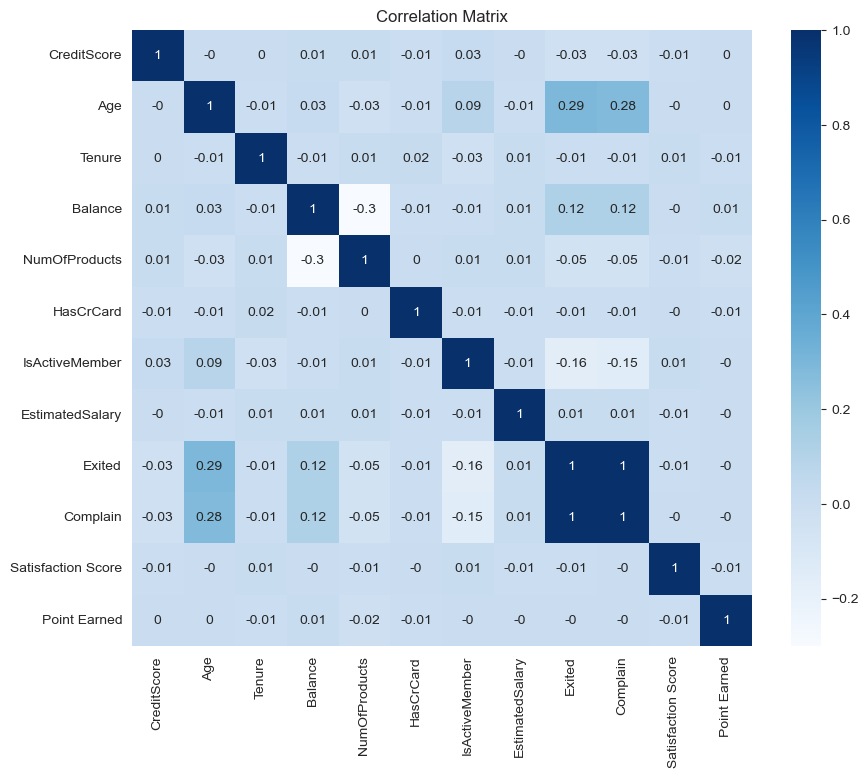

In [36]:
sns.set_style('whitegrid')
corr = df.corr(numeric_only = True).round(2)

plt.figure(figsize= (10, 8))
plt.title('Correlation Matrix')
sns.heatmap(data = corr, annot= True, cmap = 'Blues', cbar= True)
plt.show()

In [38]:
corr['Exited'].sort_values(ascending = False)

Exited                1.00
Complain              1.00
Age                   0.29
Balance               0.12
EstimatedSalary       0.01
Point Earned         -0.00
Tenure               -0.01
HasCrCard            -0.01
Satisfaction Score   -0.01
CreditScore          -0.03
NumOfProducts        -0.05
IsActiveMember       -0.16
Name: Exited, dtype: float64

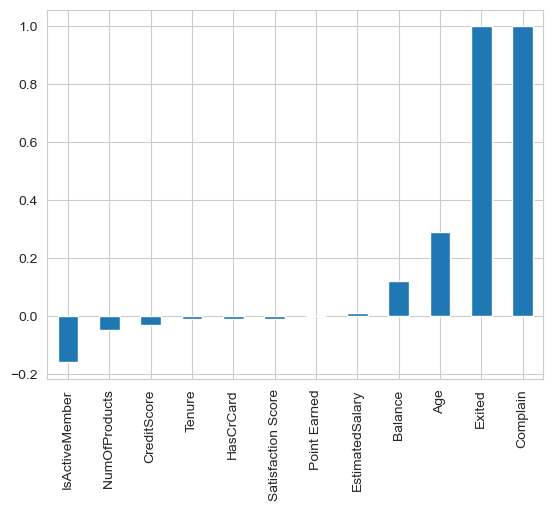

In [40]:
corr['Exited'].sort_values().plot(kind='bar')
plt.show()

Observations

1. The three important features impacting churn rate in the positive direction is balance, age, and complaint.
2. Member status, number of products and credit score are negatively correlated with exited.
3. Exited & Complain have a 100% correlation or perfect correlation with each other. We will drop Complain from the model

# Churn as Target Variable¶


Let us now look at the target variable Exited's overall distribution

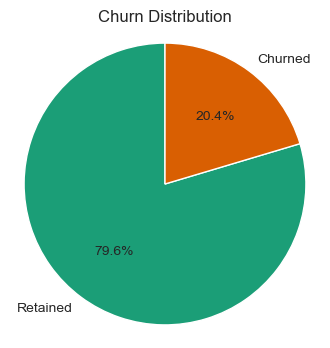

In [44]:
labels = ['Retained', 'Churned']
plt.figure(figsize = (4,4))
plt.pie(x = df['Exited'].value_counts(), labels= labels, colors=plt.cm.Dark2.colors,
        autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show() 

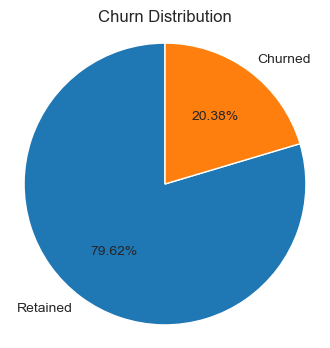

In [46]:
labels = ['Retained','Churned']
plt.figure(figsize = (4,4))
plt.pie(x = df['Exited'].value_counts(), labels=labels, autopct='%1.2f%%', startangle =90)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

Observations

. 20.38% of total customers are exiting the bank.It is significant number of percentage for any organization

Churn by Gender

Which gender is most likley to churn?

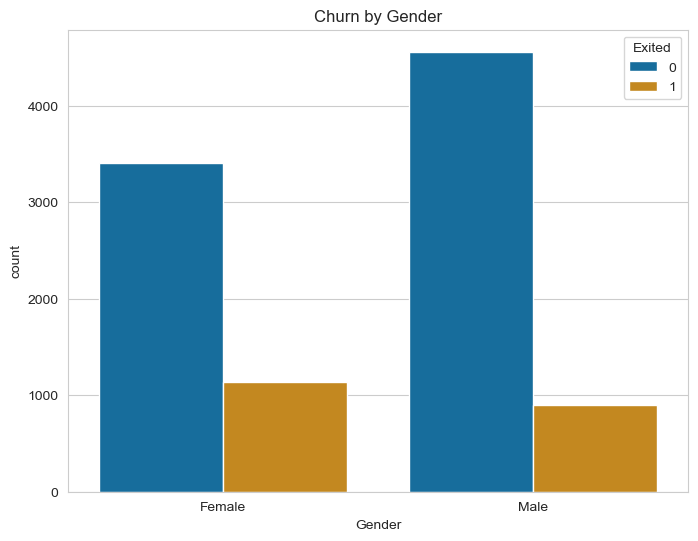

In [51]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'Gender', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Gender')
plt.show()

In [53]:
#churn rate by gender

churn_rate_gender = df.groupby('Gender')['Exited'].mean()*100
print(churn_rate_gender)

Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64


25% of customers leaving are female. The corresponding figure for males is 16.47%

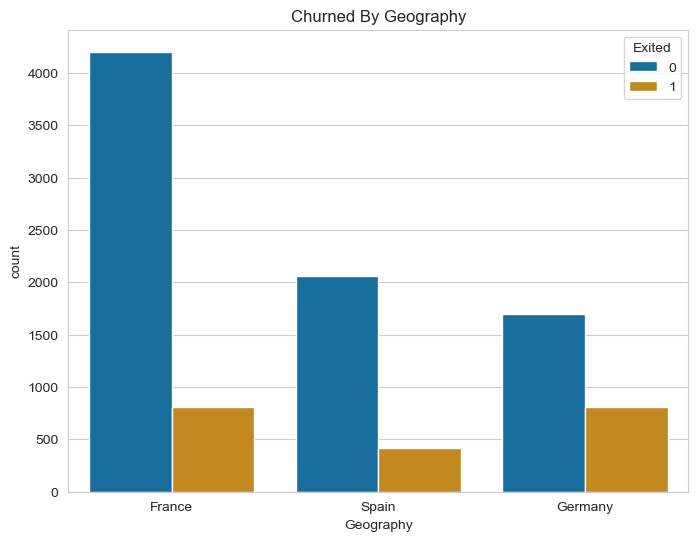

In [57]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x ='Geography', hue = 'Exited', palette = 'colorblind')
plt.title('Churned By Geography')
plt.show()

In [59]:
# churn rate  by Geography
churn_rate_geography = df.groupby('Geography')['Exited'].mean()*100
print(churn_rate_geography)

Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


Germany has the highest churn rate at 32.44%, followed by Spain and France

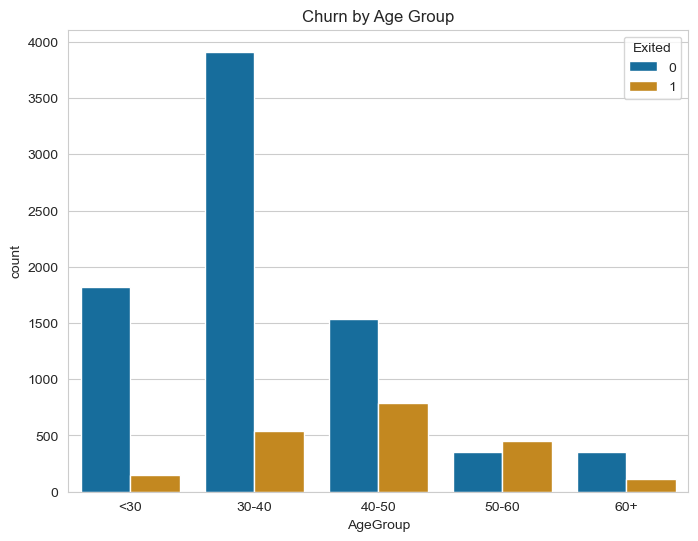

In [63]:
#Group age 
df['AgeGroup'] = pd.cut(df['Age'], bins = [0, 30, 40, 50, 60, np.inf],
                        labels = ['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize = (8,6))
plt.title('Churn by Age Group')
sns.countplot(data = df, x = 'AgeGroup', hue = 'Exited', palette= 'colorblind')
plt.show()

In [65]:
# churn rate  by Age Group
churn_rate_age = df.groupby('AgeGroup')['Exited'].mean()*100
print(churn_rate_age)

AgeGroup
<30       7.520325
30-40    12.109638
40-50    33.965517
50-60    56.210790
60+      24.784483
Name: Exited, dtype: float64


50-60 has the highest churn rate at 56.21%, followed by 40-50 at 34%, and the 60+ category at 25%. The younger customers retain.

Churn By Number Of Products

As we have seen negative correlation between them,so most likely if number of products goes up, churn rate should go down

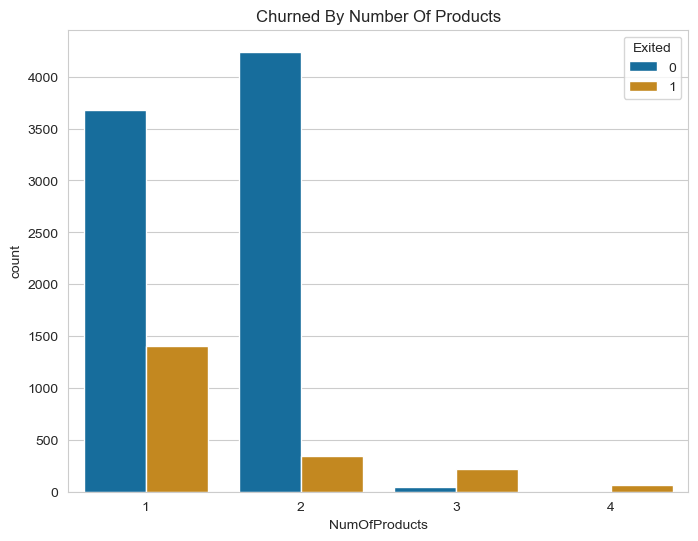

In [69]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x ='NumOfProducts', hue = 'Exited', palette = 'colorblind')
plt.title('Churned By Number Of Products')
plt.show()

In [71]:
churn_rate_num_of_products = df.groupby('NumOfProducts')['Exited'].mean()*100
print(churn_rate_num_of_products)


NumOfProducts
1     27.714398
2      7.603486
3     82.706767
4    100.000000
Name: Exited, dtype: float64


We can observe that customers with more than 2 products are more likely to leave

Churn vs Credit card

Does Owning a cred card lead to more exits?

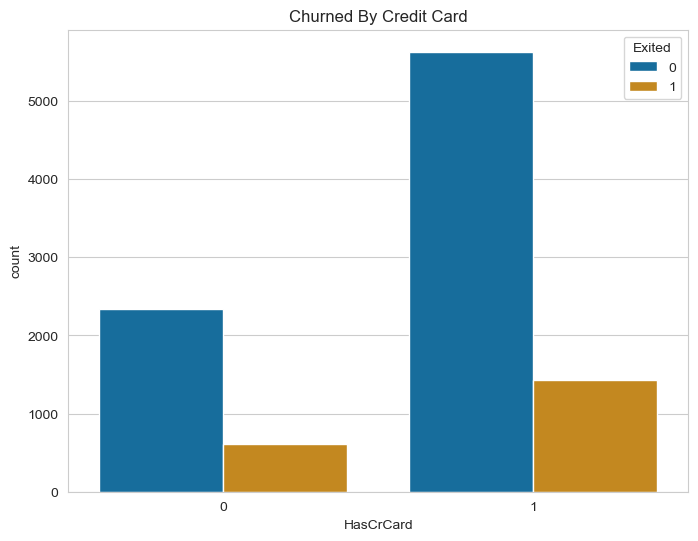

In [76]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x ='HasCrCard', hue = 'Exited', palette = 'colorblind')
plt.title('Churned By Credit Card')
plt.show()

In [78]:
churn_rate_Credit_Card = df.groupby('HasCrCard')['Exited'].mean()*100
print(churn_rate_Credit_Card)

HasCrCard
0    20.814941
1    20.198441
Name: Exited, dtype: float64


Customers with credit cards are slightly less likely to exit

Churn by Member Activity Status

Who are more likely to be retained? Active customers or non-active customers?

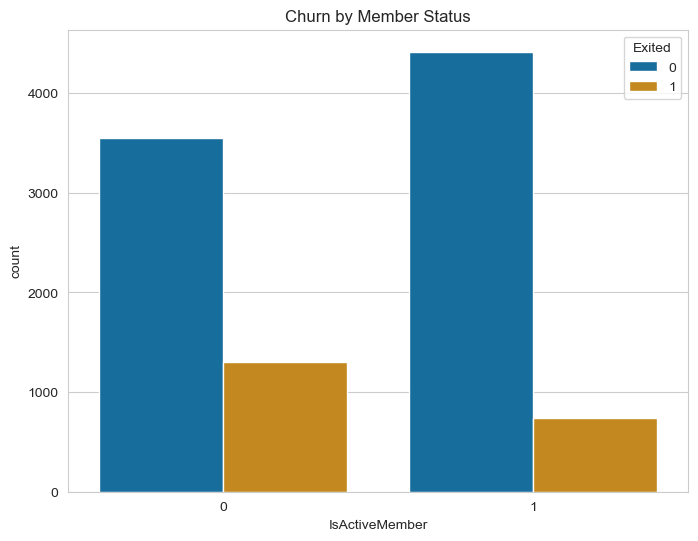

In [83]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'IsActiveMember', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Member Status')
plt.show() 

In [85]:
churn_rate_active_status = df.groupby('IsActiveMember')['Exited'].mean()*100
print(churn_rate_active_status)

IsActiveMember
0    26.871520
1    14.269074
Name: Exited, dtype: float64


As expected, non-active customers are exiting more

Churn by Tenure

Do loyal customers stay or leave?

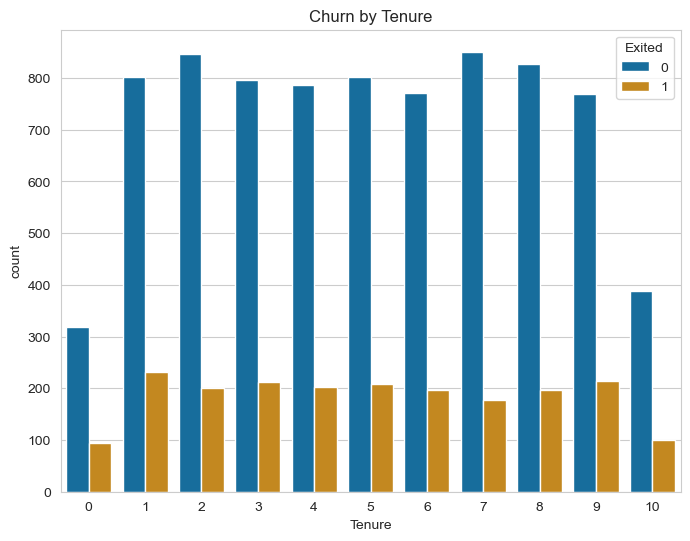

In [90]:
plt.figure(figsize = (8,6))
plt.title('Churn by Tenure')
sns.countplot(x = 'Tenure', hue = 'Exited', palette = 'colorblind', data = df)
plt.show()

In [92]:
churn_rate_tenure = df.groupby('Tenure')['Exited'].mean()*100
print(churn_rate_tenure)

Tenure
0     23.002421
1     22.415459
2     19.179389
3     21.110010
4     20.525784
5     20.652174
6     20.268873
7     17.217899
8     19.219512
9     21.747967
10    20.612245
Name: Exited, dtype: float64


The average churn rate is around 20% across tenures but customers with tenure more than ten years are slightly less likely to exit the bank.

# Continuous Variables
Let's look at some of our continuos variables and their distributions.

Credit Score

As seen before credit score has a -0.03 correlation with our target variable. Let's see how it is distributed

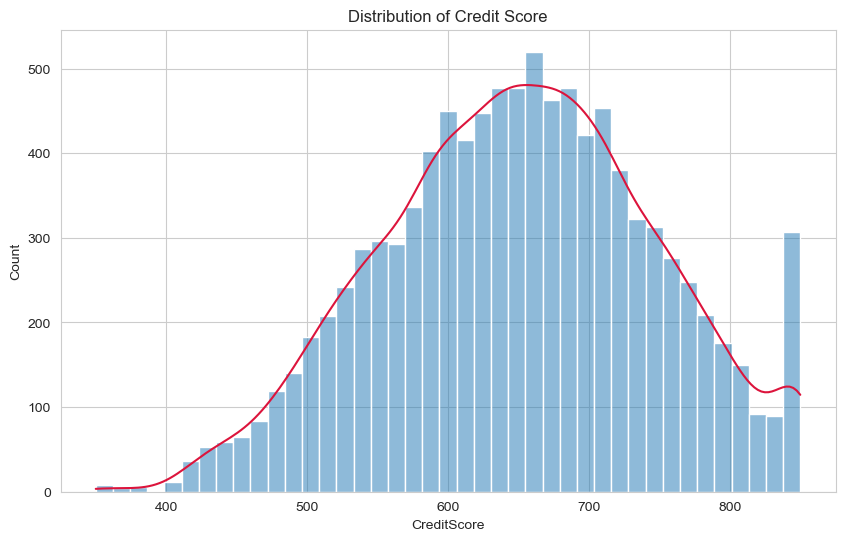

In [96]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Credit Score')
ax = sns.histplot(data = df, x = 'CreditScore', palette= 'colorblind', kde = True)
ax.lines[0].set_color('crimson')
plt.show() 

.The mean Credit score is about 650.

.The variable has an almost Gaussian Distribution.

Balance

How does the balance variable look as a distribution?

EstimatedSalary

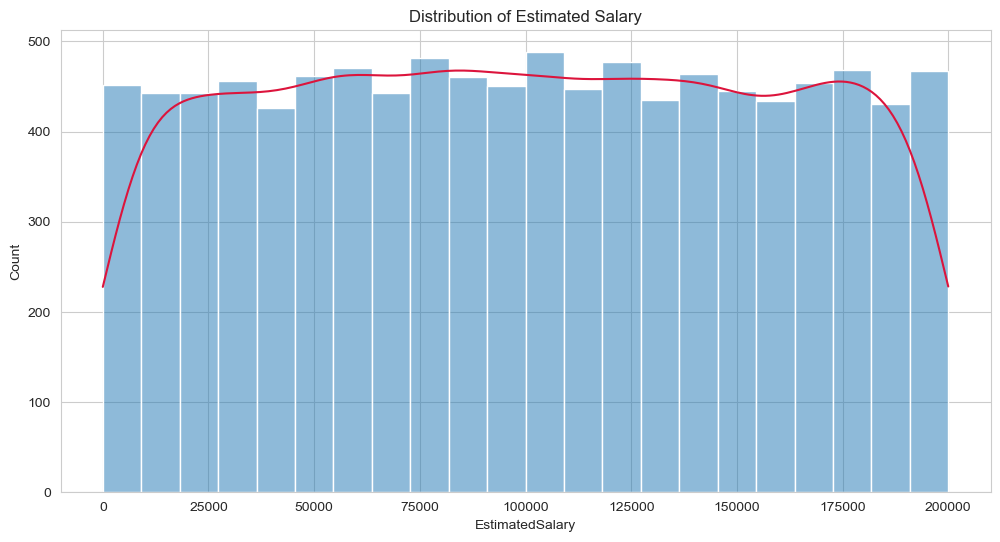

In [103]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Estimated Salary')
ax = sns.histplot(data = df, x = 'EstimatedSalary', palette= 'colorblind', kde = True)
ax.lines[0].set_color('crimson')
plt.show()

The variable follows a uniform distribution

# Insights¶
.The correlation matrix has an interesting relationship- the complaint and Exited variables are 100% positively correlated.

.Churn Rate- about 20% of customers are leaving the bank, out of the 10,000.

.Churn vs. Features

.Gender: 25.07% of female customers vis-a-vis 16.47% male customers are exiting.

.Geography: Amongst the countries, Germany has the highest churn rate of 32.44%, followed by Spain (16.67%) and France (16.17%).

.Age Group: The majority of customers leaving are in the 50-60 age range, with a churn rate of 56.21%, followed by the 40-50 age group with a corresponding rate of 33.96%.

.Tenure : Even loyal customers with ten years of association have a churn rate of 20%. Customers below the one year mark have a churn rate of 23%.

.Active Member: Non-active members have a higher churn rate of 27% while active customers of the bank have a churn of 14%.

.Number of Products: Interestingly, customers with higher number of products are more likely to churn. Customers who have bought 3 products have a churn rate of 83% while those who bought only one product have a churn rate of 28%.

.For the continuous variables of CreditScore,Balance &EstimatedSalary the following was observed-

.The mean Credit score is about 650.The variable has an almost Gaussian Distribution.

.A normal distribution is also seen for the balance variable.However, a little over 3,500 customers have zero balance in their accounts. This is a significant outlier for a total of 10,000 clients.

.The EstimatedSalary follows the uniform distribution.

# Data Preprocessing¶¶

This phase of any data science problem involves diving deeper into the columns to look for gaps, inconsistencies in the data. Questions to ask-

How are the columns distributed? Are distributions compatible with the model?

Which columns are categorical? If so, do they need to be converted into dummy variables?

Which numerical columns require feature scaling? What type of scaler to use for the given problem?

Are there any columns which need to be dropped for the model to learn better?

In [110]:
df.dtypes

CreditScore              int64
Geography               object
Gender                  object
Age                      int64
Tenure                   int64
Balance                float64
NumOfProducts            int64
HasCrCard                int64
IsActiveMember           int64
EstimatedSalary        float64
Exited                   int64
Complain                 int64
Satisfaction Score       int64
Card Type               object
Point Earned             int64
AgeGroup              category
dtype: object

In [112]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned',
       'AgeGroup'],
      dtype='object')

In [114]:
df.duplicated().sum()

0

In [116]:
df=df.drop(['Satisfaction Score','Card Type','Point Earned','Complain','AgeGroup'],axis =1)

In [118]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [120]:
catgorical_columns=df.select_dtypes(include=['object']).columns
catgorical_columns

Index(['Geography', 'Gender'], dtype='object')

In [122]:
lb=LabelEncoder()
for col in catgorical_columns:
    df[col]=lb.fit_transform(df[col])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# Balancing Data

In [125]:
X =df.drop(columns=['Exited'])  
y=df['Exited']

In [127]:
from imblearn.over_sampling import SMOTE
resampler = SMOTE()
X,y = resampler.fit_resample(X,y)

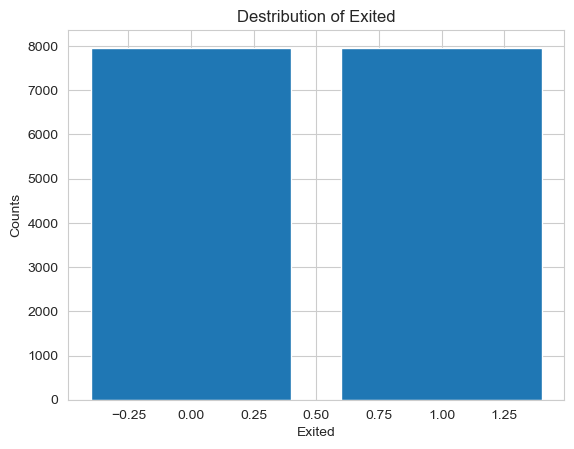

In [128]:
counts=y.value_counts()
plt.bar(counts.index,counts.values)
plt.title('Destribution of Exited')
plt.xlabel('Exited')
plt.ylabel('Counts')
plt.show()

In [129]:
combined = pd.concat([X_train,y_train], axis=1)

correlation_matrix = combined.corr() 
sns.heatmap(correlation_matrix,annot=True,fmt='.2f')
plt.show()

NameError: name 'X_train' is not defined

# Test Splitting the Data¶

Let's split the data in the 80-20 ratio where 80% of the data will be used to train the model. First, we create X and y.

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

# Feature Scaling

This is a pre-processing technique to standardize the independent features in a fixed range. It is done to handle highly varying magnitudes/values/units in the data.

A machine learning algorithm without feature scaling tends to put greater weight to larger values and lesser weights to smaller values, regardless of the unit of the values. This effects the learning of the model.

In [139]:
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [141]:
def evaluate_model(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    cm = confusion_matrix(y_test, y_pred)
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.show()

# Model- Logistic Regression¶

Logistic Regression is a linear regression problem where the target/dependent variable has a binary output. This target variable is regressed on a set of independent features similar to a linear regression.

Here, the Exited is the dependent variable/target which has an output of either 0 (customer has not churned) or 1 (customer has churned).

In [144]:
LR= LogisticRegression()

# Train the model
LR.fit(X_train, y_train)

# Make predictions
y_pred_LR = LR.predict(X_test)

Accuracy: 0.6788069073783359
Precision: 0.6603892027620841
Recall: 0.6857887874837028
ROC AUC: 0.6790542968308884


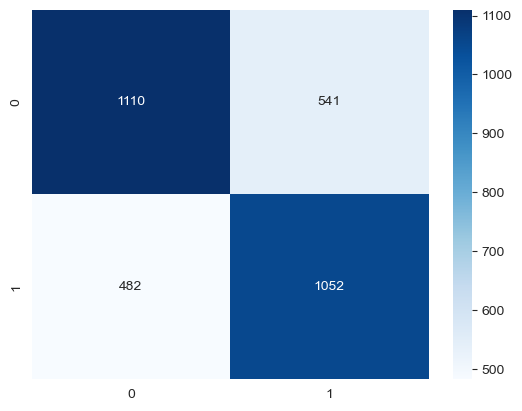

In [146]:
evaluate_model(y_test,y_pred_LR)

# Model- Decision Tree Classifier

In [149]:
dt = DecisionTreeClassifier(criterion= "gini",max_depth = 5,random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

Accuracy: 0.8015698587127159
Precision: 0.7905927835051546
Recall: 0.7998696219035202
ROC AUC: 0.8015096141013663


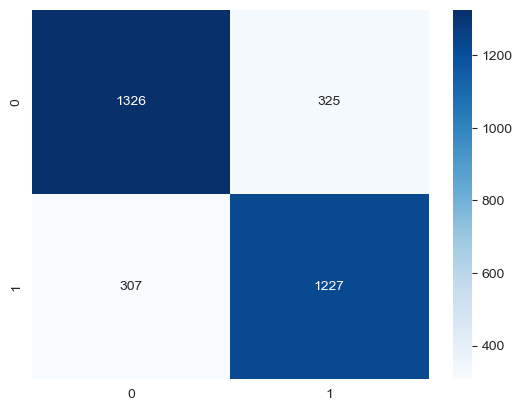

In [151]:
#Evaluate the model
evaluate_model(y_test,y_pred_dt)

# Model- Random Forest Classifier

In [154]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
RF.fit(X_train, y_train)

# Make predictions
y_pred_rf = RF.predict(X_test)

Accuracy: 0.8596546310832025
Precision: 0.8411801632140615
Recall: 0.8735332464146024
ROC AUC: 0.860146393043764


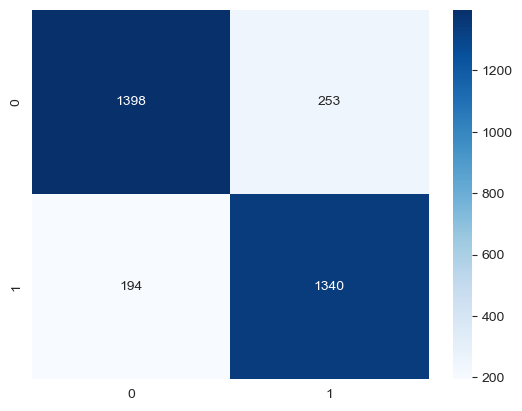

In [155]:
evaluate_model(y_test,y_pred_rf)

In [158]:
# Logistic Regression ROC Curve
y_pred_proba_log = LR.predict_proba(X_test_scaled)[:,1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
roc_auc_log = roc_auc_score(y_test, y_pred_proba_log)

In [160]:
# Random Forest ROC Curve
y_pred_proba_rf = RF.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

In [162]:
# Decision Tree ROC Curve
y_pred_proba_dt = dt.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Model Evaluation

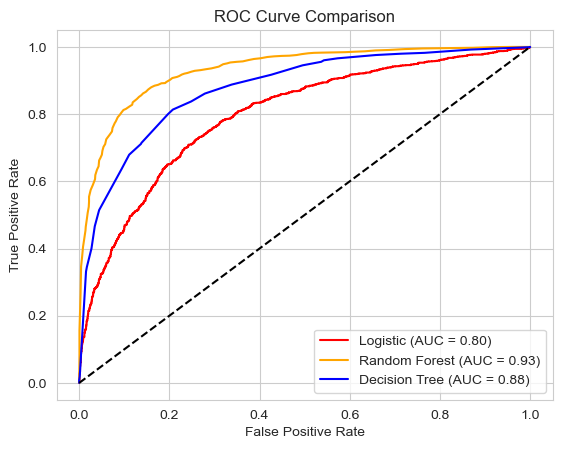

In [165]:
# Plotting ROC Curves
plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC = {roc_auc_log:.2f})", color="red")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color="orange")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--')  # Black dashed line for reference
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [168]:
# Churn Prediction Function
def predict_exited(model, scaler, input_data):
    
    # Convert the input data to a numpy array
    input_data = np.array(input_data).reshape(1, -1)
    
    input_data_scaled = scaler.transform(input_data)
    
    prediction = model.predict(input_data_scaled)
    
    # Output
    if prediction == 1:
        return "The customer is likely to churn."
    else:
        return "The customer is unlikely to churn."

In [170]:
# Input values
input_data = [600, 1, 0, 40, 5, 60000, 2, 1, 1, 50000]  

#Logistic Regression model
model_1 = LR

## model_1 Result
result = predict_exited(model_1, scaler, input_data)
print(result)

The customer is unlikely to churn.


In [172]:
# Input values
input_data = [600, 1, 0, 40, 5, 60000, 2, 1, 1, 50000]  

#Decision Tree model
model_2 = dt

## model_1 Result
result = predict_exited(model_2, scaler, input_data)
print(result)

The customer is unlikely to churn.


In [174]:
# Input values
input_data = [600, 1, 0, 40, 5, 60000, 2, 1, 1, 50000]  

#Random Forest  model
model_3 = RF

## model_1 Result
result = predict_exited(model_3, scaler, input_data)
print(result)

The customer is unlikely to churn.


# Conclusion

-All three models show same output for sample input data and show similar ROC value.

-ROC AUC value is high for Random Forest model(0.93)  and lowest Logistic Regression (0.80)